In [1]:
!pip install catboost

  Using cached catboost-1.2.8-cp312-cp312-win_amd64.whl.metadata (1.5 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
Using cached catboost-1.2.8-cp312-cp312-win_amd64.whl (102.4 MB)


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
#import lightgbm as lgb
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [5]:
df= pd.read_csv("C:\\Users\\salma\\Downloads\\customer_data.csv")

In [7]:
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [11]:
df['label'].value_counts()


label
0    900
1    225
Name: count, dtype: int64

In [13]:
df.drop('id',axis=1,inplace=True)

In [15]:
df.columns

Index(['label', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7',
       'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

In [17]:
df.isna().sum()

label       0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [19]:
df.describe()

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [21]:
df['fea_2'].fillna(df['fea_2'].mean(),inplace=True)

In [23]:
df.isna().sum()

label     0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [25]:
df.duplicated().sum()

0

In [27]:
x=df.drop('label',axis=1) #feature 
y=df['label']#label

In [29]:
from imblearn.over_sampling import SMOTEN

In [30]:
smot=SMOTEN()

In [31]:
new_x,new_y=smot.fit_resample(x,y)


In [34]:
new_y.value_counts()

label
1    900
0    900
Name: count, dtype: int64

In [35]:
x_train,x_test,y_train, y_test= train_test_split(new_x,new_y,test_size=0.2,random_state=42)

In [36]:
new_x.describe()

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1800.000000,1800.000000,1800.000000,1.800000e+03,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,5.516111,1270.109258,2.410556,9.821389e+04,1.953333,10.806667,4.854444,98.946667,4.215000,137104.097778,107.130844
std,1.370201,47.820440,0.837424,7.785358e+04,0.210983,2.570920,2.616902,12.985366,0.851313,133893.983977,107.402885
min,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,4.000000,1233.500000,2.000000,5.000000e+04,2.000000,8.000000,5.000000,86.000000,3.000000,60030.000000,1.000000
50%,5.000000,1277.000000,3.000000,8.000000e+04,2.000000,11.000000,5.000000,102.000000,4.000000,72000.000000,158.113883
75%,7.000000,1290.500000,3.000000,1.200000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151300.000000,187.082869
max,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [40]:
scaler=StandardScaler()
x_train[['fea_2','fea_4','fea_10']]=scaler.fit_transform(x_train[['fea_2','fea_4','fea_10']])
x_test[['fea_2','fea_4','fea_10']]=scaler.transform(x_test[['fea_2','fea_4','fea_10']])

In [43]:
def apply_model(model):
    model.fit(x_train,y_train)
    test_pred=model.predict(x_test)
    trian_pred = model.predict(x_train)
    print('train predection')
    print(classification_report(y_train,trian_pred))
    print ('test predection')
    print(classification_report(y_test,test_pred))
    sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt='d')

train predection
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       724
           1       0.73      0.79      0.76       716

    accuracy                           0.75      1440
   macro avg       0.76      0.75      0.75      1440
weighted avg       0.76      0.75      0.75      1440

test predection
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       176
           1       0.77      0.78      0.77       184

    accuracy                           0.77       360
   macro avg       0.77      0.77      0.77       360
weighted avg       0.77      0.77      0.77       360



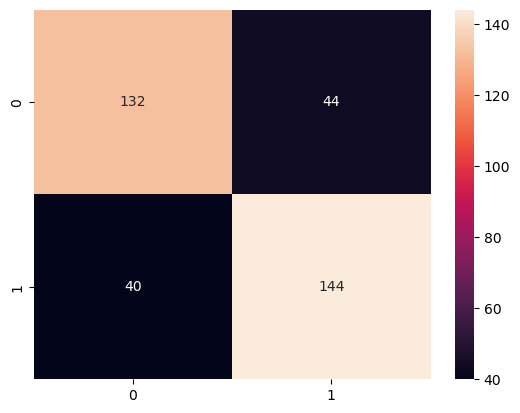

In [45]:
lr_mode= LogisticRegression()
apply_model(lr_mode)

train predection
              precision    recall  f1-score   support

           0       0.79      0.73      0.75       724
           1       0.74      0.80      0.77       716

    accuracy                           0.76      1440
   macro avg       0.76      0.76      0.76      1440
weighted avg       0.76      0.76      0.76      1440

test predection
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       176
           1       0.74      0.78      0.76       184

    accuracy                           0.75       360
   macro avg       0.75      0.75      0.75       360
weighted avg       0.75      0.75      0.75       360



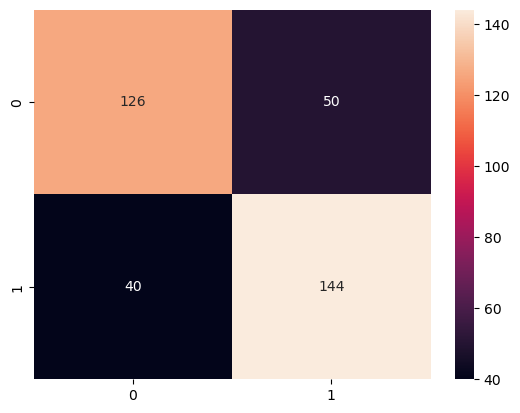

In [46]:
svc_model=SVC(kernel='linear')
apply_model(svc_model)

train predection
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       724
           1       1.00      1.00      1.00       716

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440

test predection
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       176
           1       0.76      0.86      0.81       184

    accuracy                           0.79       360
   macro avg       0.80      0.79      0.79       360
weighted avg       0.80      0.79      0.79       360



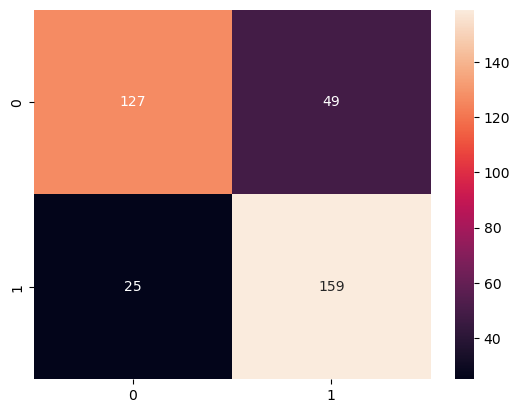

In [48]:
dt_model=DecisionTreeClassifier()
apply_model(dt_model)

train predection
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       724
           1       1.00      1.00      1.00       716

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440

test predection
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       176
           1       0.91      0.83      0.87       184

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



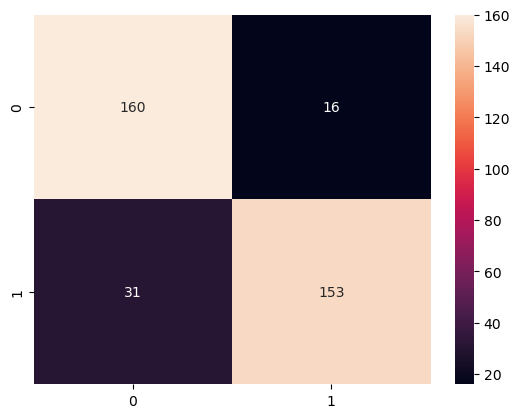

In [49]:
rf_model=RandomForestClassifier()
apply_model(rf_model)

train predection
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       724
           1       1.00      0.80      0.89       716

    accuracy                           0.90      1440
   macro avg       0.92      0.90      0.90      1440
weighted avg       0.92      0.90      0.90      1440

test predection
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       176
           1       0.86      0.76      0.81       184

    accuracy                           0.81       360
   macro avg       0.82      0.82      0.81       360
weighted avg       0.82      0.81      0.81       360



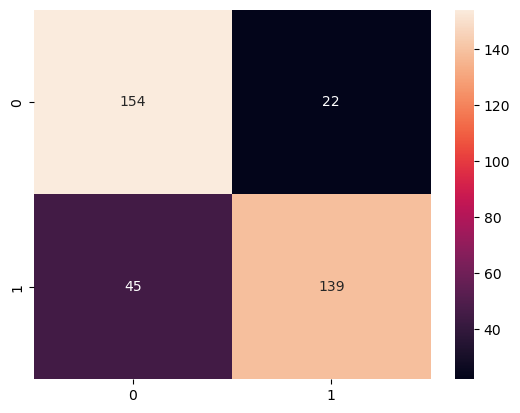

In [50]:
knn_model=KNeighborsClassifier(n_neighbors=2)
apply_model(knn_model)

In [51]:
xgb_model = XGBClassifier()
xgb_params = {
    'n_estimators' : [10, 20, 40, 50, 100, 150, 200],
    'max_depth' : [5, 7, 10],
    'learning_rate' : [0.1, 0.2, 0.3],
    'subsample' : [0.8, 1.0]
}

In [52]:
xg_grid=GridSearchCV(xgb_model, xgb_params, 
                       scoring = 'accuracy', cv = 5, verbose = 1, n_jobs= -1)

In [53]:
xg_grid.fit(x_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [10, 20, 40, 50, 100, 150, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [54]:
xg_grid.best_params_

{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.8}

train predection
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       724
           1       1.00      1.00      1.00       716

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440

test predection
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       176
           1       0.87      0.84      0.85       184

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



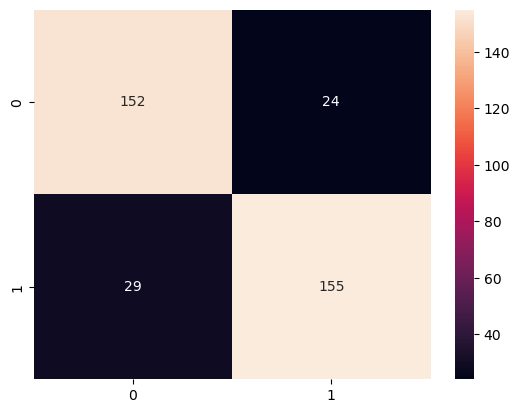

In [57]:
xgboost_mode=XGBClassifier(earning_rate = 0.2, max_depth = 10, n_estimators = 100, subsample = 1.0)
apply_model(xgboost_mode)

In [59]:
cat_model = CatBoostClassifier()
cat_params = {
    'iterations' : [100, 200, 300],
    'learning_rate' : [0.1, 0.2, 0.3],
    'depth' : [5, 6, 7, 8, 9, 10, 11]
}

In [63]:
grid_cat = GridSearchCV(cat_model, cat_params, 
                       scoring = 'accuracy', verbose= 1, n_jobs= -1, cv = 5)

In [65]:
grid_cat.fit(x_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
0:	learn: 0.6511173	total: 113ms	remaining: 22.6s
1:	learn: 0.6178248	total: 116ms	remaining: 11.4s
2:	learn: 0.5856195	total: 118ms	remaining: 7.72s
3:	learn: 0.5630564	total: 120ms	remaining: 5.86s
4:	learn: 0.5442211	total: 122ms	remaining: 4.75s
5:	learn: 0.5276441	total: 124ms	remaining: 4.02s
6:	learn: 0.5139976	total: 127ms	remaining: 3.49s
7:	learn: 0.5007045	total: 128ms	remaining: 3.08s
8:	learn: 0.4904185	total: 131ms	remaining: 2.78s
9:	learn: 0.4792632	total: 133ms	remaining: 2.52s
10:	learn: 0.4701901	total: 135ms	remaining: 2.32s
11:	learn: 0.4620220	total: 138ms	remaining: 2.16s
12:	learn: 0.4556719	total: 140ms	remaining: 2.02s
13:	learn: 0.4495606	total: 142ms	remaining: 1.89s
14:	learn: 0.4441016	total: 144ms	remaining: 1.78s
15:	learn: 0.4399295	total: 146ms	remaining: 1.68s
16:	learn: 0.4343065	total: 148ms	remaining: 1.6s
17:	learn: 0.4298543	total: 151ms	remaining: 1.52s
18:	learn: 0.4267420	total: 153

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002BE2AC3BE30>,
             n_jobs=-1,
             param_grid={'depth': [5, 6, 7, 8, 9, 10, 11],
                         'iterations': [100, 200, 300],
                         'learning_rate': [0.1, 0.2, 0.3]},
             scoring='accuracy', verbose=1)

In [67]:
grid_cat.best_params_

{'depth': 5, 'iterations': 200, 'learning_rate': 0.1}

0:	learn: 0.6511173	total: 3.55ms	remaining: 707ms
1:	learn: 0.6178248	total: 8.52ms	remaining: 844ms
2:	learn: 0.5856195	total: 13ms	remaining: 852ms
3:	learn: 0.5630564	total: 17.2ms	remaining: 845ms
4:	learn: 0.5442211	total: 20.5ms	remaining: 798ms
5:	learn: 0.5276441	total: 23.1ms	remaining: 747ms
6:	learn: 0.5139976	total: 25.9ms	remaining: 713ms
7:	learn: 0.5007045	total: 28.3ms	remaining: 679ms
8:	learn: 0.4904185	total: 30.4ms	remaining: 645ms
9:	learn: 0.4792632	total: 32.1ms	remaining: 610ms
10:	learn: 0.4701901	total: 34ms	remaining: 585ms
11:	learn: 0.4620220	total: 35.8ms	remaining: 561ms
12:	learn: 0.4556719	total: 38.3ms	remaining: 551ms
13:	learn: 0.4495606	total: 40.8ms	remaining: 542ms
14:	learn: 0.4441016	total: 42.7ms	remaining: 527ms
15:	learn: 0.4399295	total: 45.2ms	remaining: 520ms
16:	learn: 0.4343065	total: 47.2ms	remaining: 508ms
17:	learn: 0.4298543	total: 49.1ms	remaining: 497ms
18:	learn: 0.4267420	total: 51.2ms	remaining: 488ms
19:	learn: 0.4260716	total

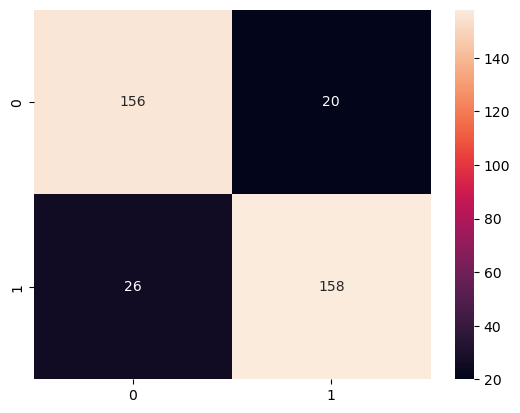

In [73]:
cat_model=CatBoostClassifier(depth= 5, iterations= 200, learning_rate= 0.1)
apply_model(cat_model)